In this notebook, I have reviewed if there is any bias in the given data set for pneumonia, by checking using matplotlib the class sizes for both the classes. After doing so, there was a clear difference between the number of images available for the NORMAL class and less for the pneumonia class. That means that during the training process, the model could be biased in its classification as well, simply because of the data we train it with.

To solve this problem, I decided to try to augment the number of images in the pneumonia class along with images that are simply resized and are in the same color format as the initial data set, to not cause any other differences for identification. I made sure that the number of dimensions or channels in each of the images were 3, including R, G and B so that the images are in grayscale not causing a distinct change in one of the classes.

To perform the rescalign and sizing I used the keras model.



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
from pathlib import Path
import tensorflow as tf
from tensorflow.keras import layers #Data Augmentation


#importing image opening packages

In [ ]:
data=[]
labels=[]
classes=2

NORMAL_path= Path('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/NORMAL')
arr_NORMAL=[x for x in NORMAL_path.iterdir()] #list of all the images in my train/NORMAL folder

PNEUMONIA_path= Path('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/PNEUMONIA')
arr_PNEUMONIA=[x for x in PNEUMONIA_path.iterdir()] #list of all the images in my train/NORMAL folder

In [ ]:
"""
for path in arr:
  img=mpimg.imread(path)
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  """
 #This loop prints all the images in the folder

"\nfor path in arr:\n  img=mpimg.imread(path)\n  plt.imshow(img)\n  plt.axis('off')\n  plt.show()\n  "

(968, 1392)


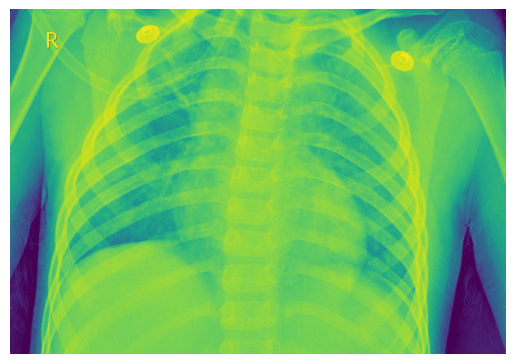

(325, 720, 3)


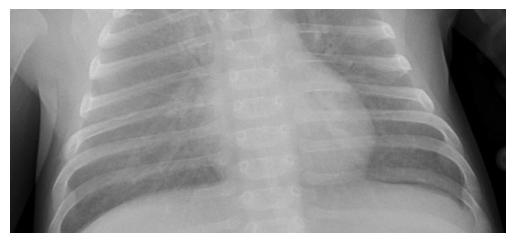

(1083, 1662)


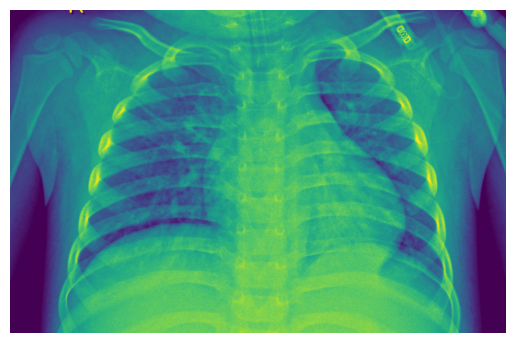

(488, 840)


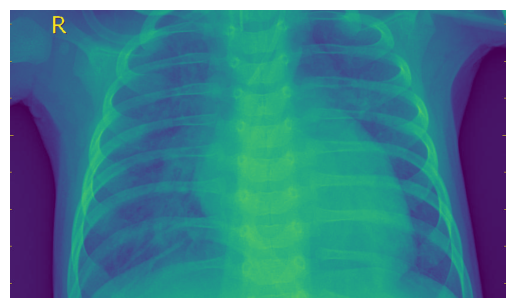

(528, 1024)


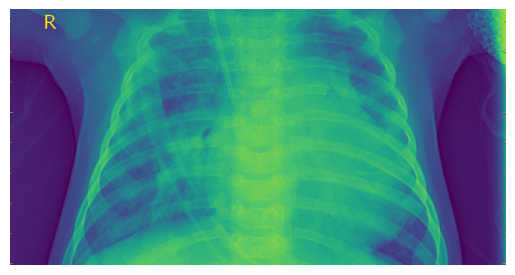

(648, 984)


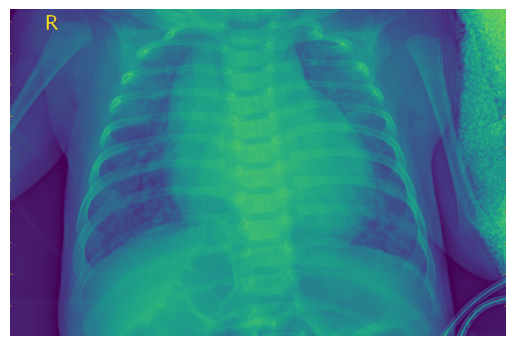

(712, 1152)


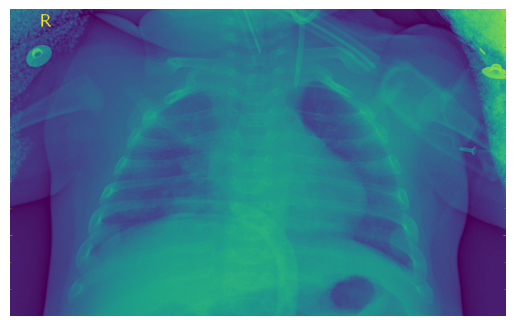

(688, 1032)


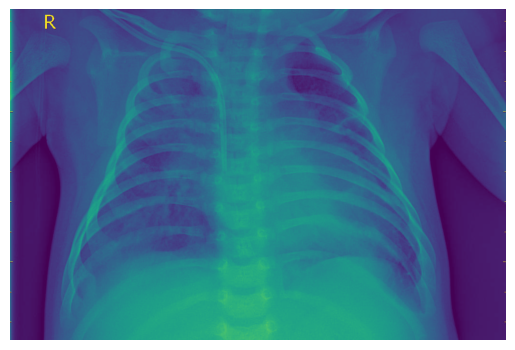

(832, 1664)


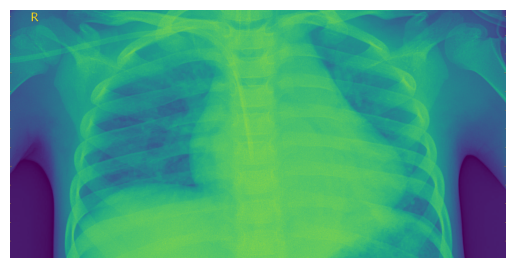

(1106, 1592)


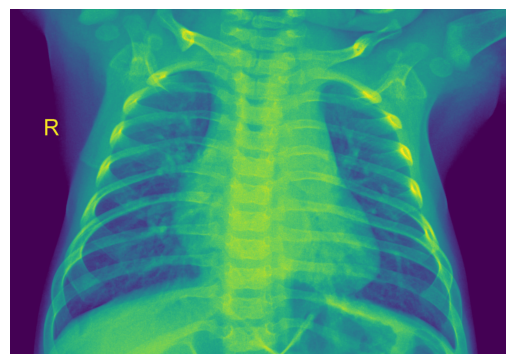

(1064, 1336)


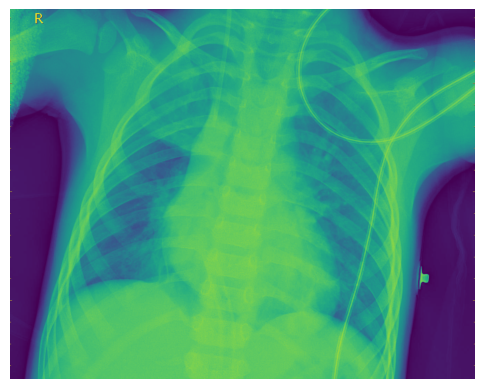

(608, 992)


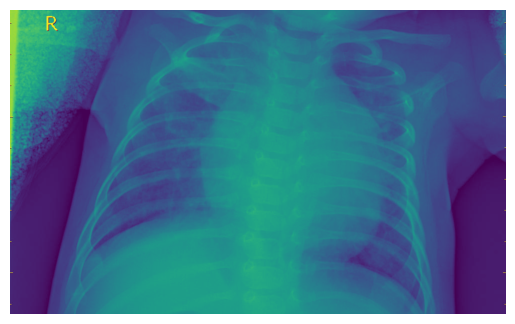

(642, 1056)


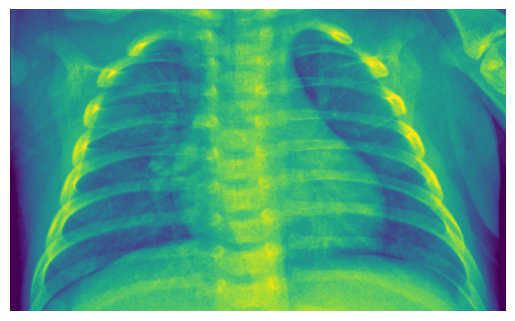

(736, 1120)


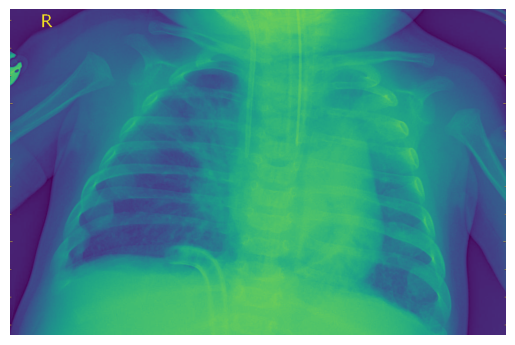

(760, 1056)


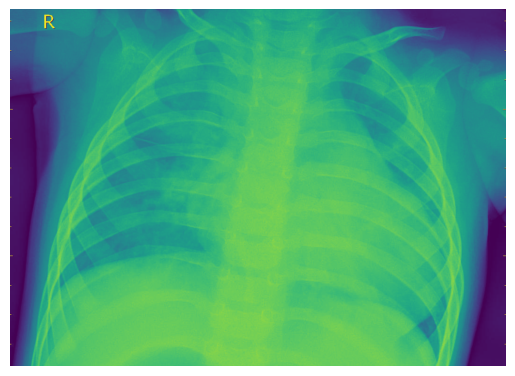

In [ ]:
for num in range(15):
  img=mpimg.imread(arr_PNEUMONIA[num])
  plt.imshow(img)
  print(img.shape)  #prints the shape or size of each of the images
  plt.axis('off')
  plt.show()

Now lets try to check the class sizes to see if there is more data in one class over another
If there is more in one over another, then there would a more likely bias in training itself
To solve this, we could augment the currnet data to fill out the class with lesser data.

In [ ]:
n_image_number=len(arr_PNEUMONIA)  #Provides me the  number of PNEUMONIA images in the Training Folder
p_image_number=len(arr_NORMAL)  #Provides me the  number of NORMAL images in the Training Folder

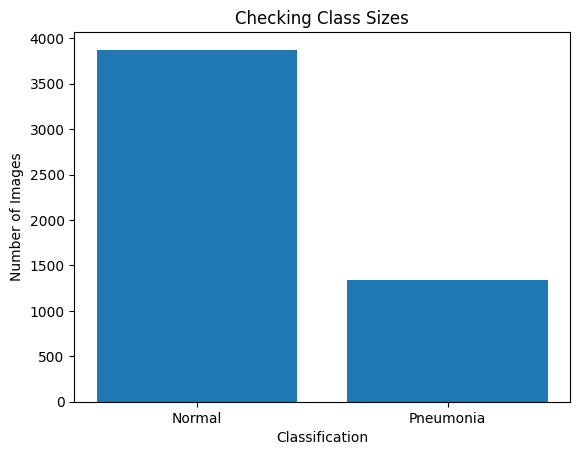

In [ ]:
Classification = ['Normal', 'Pneumonia']
Number_of_Images = [n_image_number, p_image_number]
plt.bar(Classification, Number_of_Images)
plt.title('Checking Class Sizes')
plt.xlabel('Classification')
plt.ylabel('Number of Images')
plt.show()

From this result, we can clearly see that there is way more NORMAL image sizes compared than Pneumonia, therefore during training process for the model, there could be a bias in the model itself.
We could solve thsi by augmenting the number of images in the normal class.

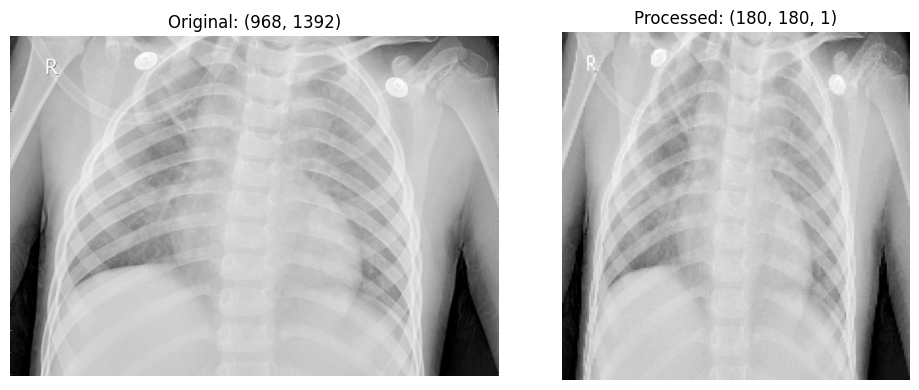

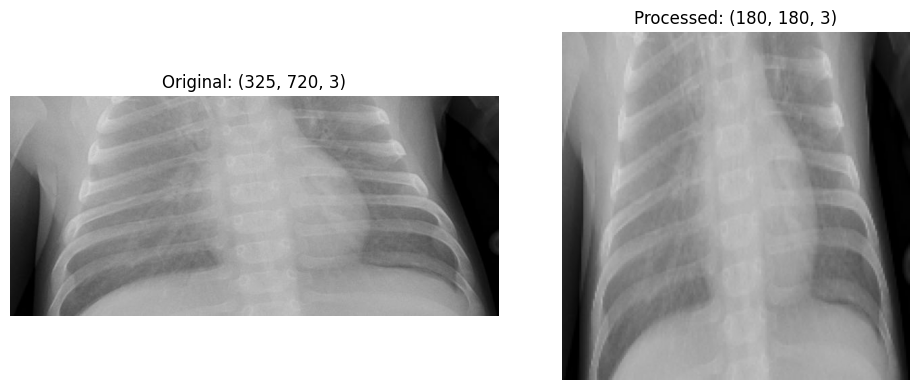

In [ ]:
IMG_SIZE = 180

# Resize and rescale images to normalized [0,1] range
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1./255)
])

for num in range(2):
    img = mpimg.imread(arr_PNEUMONIA[num])

    # Show original image
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray' if len(img.shape) == 2 else None)
    plt.title(f'Original: {img.shape}')
    plt.axis('off')

    # Add channel dimension if grayscale
    processed_img = img
    if len(img.shape) == 2:
        processed_img = tf.expand_dims(img, axis=-1)

    # Apply resize and rescale
    processed_img = resize_and_rescale(processed_img)

    # Show processed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_img, cmap='gray' if processed_img.shape[-1] == 1 else None)
    plt.title(f'Processed: {processed_img.shape}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()